##### Disclaimers 
This material is derived from **[scikit-learn-mooc](https://github.com/INRIA/scikit-learn-mooc)** under the fair-usage clause of `Creative Commons`.

*References to all the sources apart from the scikit-learn-mooc are linked*

### SECOND SESSION

#### Introduction to Underfitting and Overfitting 

We will try to understand when and why a model does or does not generalize well on unseen data through the vital lens of Overfitting and Underfitting.

Let us try to understand the core issue with the help of some visual examples.

***

We are given two prediction models, where one black point maps an input X to a target y, and we want to predict the value y from X.

And of course, we have access to only these black points as the training set.

On the left, we fit a simple linear model and get a line with a negative slope that detects the general trend of this cloud of data points. 

On the right-hand side, we fit a polynomial with a large number of degrees. This polynomial can go through all the individual black, and thus we get no prediction error.

<br>

Which is a better model?

![right is good fit?](../figures/fit_1.png)

One might intuitively pick the **right as a better fit** 

But as we learned in the last session, we try to find the model's generalization performance using unseen data.

So when we use new data points displayed as orange data points, we see that the simple model is making the same kind of error on both the test and train data,
but the polynomial fit, though it performs excellently on train data, makes errors outside the possible values of orange points.


![not so right fit?](../figures/fit_2.png)

***

<br>

Let us look at another example. 

We are given the observation for training and say we also know the underlying model used to generate the data, which will not be possible in the real world, though.

![observation and underlyting model](../figures/obervation_known_model.png)

<br>

*Now, we will try to fit the polynomials of various degrees for a given set of observations*


![polynomial models](../figures/poly_fit.png)

<br>

The first one is the linear model, i.e., degree one polynomial. A degree two polynomial is a quadratic function. This one has more flexibility and can capture some of the global structure of the training set. With degree one, we have a slope as a degree of freedom. 
When we increase the degree of freedom further, we see that we manage to follow the changes in the slope of the actual generative function.

And suppose we increase further to degree 9 polynomial. In that case, we see that we have this kind of wide variation of the prediction that does not reflect the original structure of the data generative process. 

<br>

Ideally, we would like to find a model that would match approximately that dashed line, i.e., our generative function. 

And you see that degree two or degree five polynomials closely match the dashed line. In contrast, the degree nine polynomial is very far away, and the degree one polynomial does not find a structure. It's too constrained.

![overfitting vs underfitting](../figures/over_under.png)

***


**Overfitting**
The problem with the degree nine polynomial is that this model is too complex for the limited training data provided and overfitted for this specific training set. It cannot recover the ground truth because the flexibility in the model captures the noise of the data. The limited amount of data points that we have does not make it possible to tell whether some variations are noise or an interesting structure.

*To summarize, Overfitting happens when we do not have enough data points and we have too much noise in the relationship between Y and X.*

<br>

**Underfitting**
In the case of degree one polynomial, i.e., the linear line, we cannot capture the non-linear structure of the dataset, i.e., the global structure of the variation of Y given X as the model is too simple, which is the underfitting problem. 

But the underfitting models do not suffer from the noise because they are too constrained to be able to memorize the noise. 

*Typically, Underfitting happens when you have plenty of data and a low noise level. You choose a model that is too constrained for this complex dataset.*

<br>

**So *Underfitting* and *Overfitting* describe two opposing extremes that result in poor performance, and the sweet spot of generalization performance is in between these two extremes.**




#### Regression and Cross-Validation statergies

Cross-validation is a critical aspect of evaluating predictive models, and thus we will keep on revisiting it.

We focused on the classification problem in the last notebook and used a `K-fold` strategy.

Here we will look at a **regression problem** and use the `ShuffleSplit`.

<br>

We will use the california_housing dataset with the aim is to predicting the median value of houses in an area in California. 

The features collected are based on general real-estate and geographical information.

The target to be predicted is a continuous variable and not discrete anymore. 

*This task is called regression.*


In [1]:
# sklearn itself comes with some datasets which can come 
# handly to play around with sklearn
from sklearn.datasets import fetch_california_housing

# as frame true returns a dataframe 
housing = fetch_california_housing(
    as_frame=True
)

data, target = housing.data, housing.target

In [2]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# this price is in 100 thousands range ( 100 k$ )
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [4]:
# convert it to thousands range ( k$ )
target *= 100
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

In [5]:
# to display nice model diagram use display as diagram
from sklearn import set_config
set_config(display='diagram')

##### Decision tree learning 

Decision tree learning or induction of decision trees is one of the predictive modeling approaches used in statistics, data mining, and machine learning. 

It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). 

Tree models in which the target variable can take a discrete set of values are called classification trees. In these tree structures, leaves represent class labels, and branches represent conjunctions of features that lead to those class labels.

Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms, given their intelligibility and simplicity.

<br>

***

![decison tree via image](../figures/cart_tree_kyphosis.png)

Above is an example tree estimating the probability of kyphosis after spinal surgery. We were given the age of the patient and the vertebra at the time of surgery. The same tree is shown in three different ways. 

The left one shows the colored leaves to show the probability of kyphosis after spinal surgery and the percentage of patients in the leaf.

The middle one is the tree as a perspective plot. 

The right one is the aerial view of the middle plot. The probability of kyphosis after surgery is higher in the darker areas.


***

<br>

Note from Prof. Bzdok :

*"For many problems encountered in practice, low-order interaction effects dominate. When this is the case, models that produce strong higher-order interaction effects, such as large decision trees, suffer in the accuracy."*

[source](https://commons.wikimedia.org/wiki/File:Cart_tree_kyphosis.png)

[source](https://en.wikipedia.org/wiki/Decision_tree_learning)



In [6]:
# we will use a decision tree to solve this regression problem   
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor

DecisionTreeRegressor(random_state=42)

In [7]:
# we start with the most basic evaluation statergy
'''
splitting our dataset into two subsets: a training set and a testing set;

fitting the model on the training set;

estimating the training error on the training set;

estimating the testing error on the testing set.
'''

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42
)

regressor.fit(data_train, target_train)

regressor.score(data_test, target_test)

0.6050109760817847

##### Notes on Score result from regression model 

In case of regression the `score` function returns the `coefficient of determination` of the prediction.

The coefficient of determination $R^2$ is defined as $(1 - \frac{u}{v})$, where $u$ is the residual sum of squares $(\char` (y\char`_true - y\char`_pred)^{2}\char` ).sum()$ 

and $v$ is the total sum of squares $(\char` (\char` y\char`_true - y\char`_true.mean()\char` )^{2}\char` ).sum() $. 

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

A constant model that always predicts the expected value of $y$, disregarding the input features, would get a $R^2$ score of 0.0.

[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [8]:
# we will use the mean_absolute_error to extract the 
# error in the prediction 
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data_test)

score_test = mean_absolute_error(target_test, target_predicted)

target_predicted = regressor.predict(data_train)

score_train = mean_absolute_error(target_train, target_predicted)

print(
    f"On average, our regressor makes training error of {score_train:.2f} k$"
)

print(
    f"On average, our regressor makes testing error of  {score_test:.2f} k$"
)


On average, our regressor makes training error of 0.00 k$
On average, our regressor makes testing error of  46.56 k$


##### Notes on training and testing error 

We get perfect prediction with training data, i.e., with no error. 

It is too optimistic and almost always reveals a methodological problem of the machine learning approach.

Indeed, we trained and predicted on the same dataset. 

Since our decision tree was fully grown i.e., we didn't modify the default parameter of the DecisionTreeRegressor. By default, it did not restrict the `max_leaf_nodes` parameter and thus stored every sample in the dataset in a leaf node. 

Therefore, our decision tree memorized the dataset given during fit and made no error when predicting.

`This error computed is called the empirical error or training error.`

The goal is always, at least for a predictive model, to train to minimize the error on data did not use during training.

The testing error reported is actually about what we would expect from our model if used in a production environment.

`This error is also called the generalization error or the "true" testing error.`

##### Stability of the cross-validation estimates

By doing a single train-test split, we don't have an accurate indication regarding the robustness of the evaluation of our predictive model. In particular, if the test set is small, this estimate of the testing error will be unstable and wouldn't reflect the "true error rate" we would have observed with the same model on an unlimited amount of test data.

For example, we could have been lucky when we did the random split of our limited dataset and isolated some of the most uncomplicated cases to predict in the testing set just by chance. In such a case, the estimation of the testing error would be overly optimistic.

<br>

**Cross-validation** allows estimating the robustness of a predictive model by repeating the splitting procedure. It will give numerous training and testing errors and thus some **estimate of the variability of the model's generalization performance**.

There are [different cross-validation strategies](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators), for now, we are going to focus on one called "shuffle-split" explosed via `ShuffleSPlit` function.

At each iteration of this strategy we:

- randomly shuffle the order of the samples of a copy of the entire dataset;
- split the shuffled dataset into a train and a test set;
- train a new model on the train set;
- evaluate the testing error on the test set.

We repeat this procedure `n_splits` times. Keep in mind that the computational cost increases with `n_splits`.

***

![Cross-validation diagram](../figures/shufflesplit_diagram.png)

This figure shows the particular case of the shuffle-split cross-validation strategy using n_splits=5. 

For each cross-validation split, the procedure trains a model on all the red samples and evaluates the model's score on the blue samples. How many samples will be used for the test and train is dictated by the `train_size` and `test_size` parameter.

**The critical thing to notice is that in `ShuffleSpit` one can have overlapping samples in the test set among the different splits.**

***

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
import pandas as pd

# we will do 40 splits of the data 
# test size is 30%, train size will be 70% automatically 
# once can specify both test and train size 
cv = ShuffleSplit(
    n_splits=40,
    test_size=0.3,
    random_state=42
)
# now this neg_mean_absolute_error is very interesting part and we will discuss it more
cv_results = cross_validate(
    regressor,
    data,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error"
)

# we save the results in dataframe for ease of visualization and manipulation.
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.099519,0.002369,-46.882714
1,0.099165,0.002106,-46.042903
2,0.099860,0.002147,-47.003963
3,0.099813,0.002351,-46.716418
4,0.097270,0.002168,-47.129434


In [10]:
print(
    f"Number of results in cv_results are {len(cv_results.index)}"
)

Number of results in cv_results are 40


##### The story of neg_mean_absolute_error

A score is a metric for which higher values mean better results. 

That's how scikit-learn looks at things, or rather the semantics of scikit-learn.

On the contrary, an error is a metric for which lower values mean better results. 

The parameter scoring in cross_validate always expects a function that is a score.

To make it easy, all error metrics in scikit-learn, like mean_absolute_error, can be transformed into a score used in cross_validate. 

You need to pass a string of the error metric with an additional neg_ string at the front to the parameter scoring; for instance `scoring="neg_mean_absolute_error"`. 

In this case, the negative of the mean absolute error will be computed, equivalent to a score.



In [11]:
cv_results["test_error"] = -cv_results["test_score"]
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.099519,0.002369,-46.882714,46.882714
1,0.099165,0.002106,-46.042903,46.042903
2,0.099860,0.002147,-47.003963,47.003963
3,0.099813,0.002351,-46.716418,46.716418
4,0.097270,0.002168,-47.129434,47.129434
5,0.104749,0.001929,-44.851156,44.851156
6,0.098930,0.001980,-46.743777,46.743777
7,0.098832,0.001940,-45.926447,45.926447
8,0.099723,0.001859,-45.676299,45.676299
9,0.099551,0.002443,-45.840368,45.840368


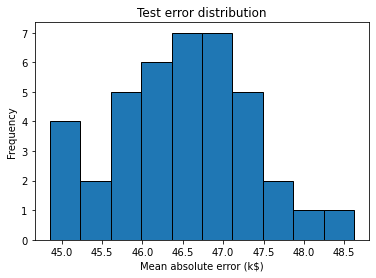

In [12]:
import matplotlib.pyplot as plt

cv_results["test_error"].plot.hist(
    bins=10,
    edgecolor="black"
)

plt.xlabel(
    "Mean absolute error (k$)"
)

_ = plt.title("Test error distribution")

In [13]:
print(
    f"The mean cross-validated testing error is: "
    f"{cv_results['test_error'].mean():.2f} k$\n"
)
print(
    f"The standard deviation of the testing error is: "
    f"{cv_results['test_error'].std():.2f} k$\n"
)

print(
    f"If we were to train a single model on the full dataset (without cross-validation)\n"
    f"and then later had access to an unlimited amount of test data,\n"
    f"we would expect model's true testing error to fall close in range {cv_results['test_error'].mean():.2f} +/- {cv_results['test_error'].std():.2f} k$.\n"
)


The mean cross-validated testing error is: 46.47 k$

The standard deviation of the testing error is: 0.86 k$

If we were to train a single model on the full dataset (without cross-validation)
and then later had access to an unlimited amount of test data,
we would expect model's true testing error to fall close in range 46.47 +/- 0.86 k$.



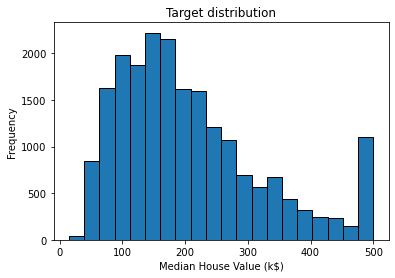

In [14]:
# let us check the scale of the natural variability of the vector target in our dataset.

target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

In [15]:
print(
    f"The standard deviation of the target is: {target.std():.2f} k$"
)

The standard deviation of the target is: 115.40 k$


##### Notes on our cross-validated prediction model

We notice that the mean estimate of the testing error obtained by cross-validation is slightly smaller than the natural scale of variation of the target variable. 

Furthermore, the standard deviation of the cross-validation estimate of the testing error is even smaller. This is a good start but not necessarily enough to decide whether the generalization performance is good enough to make our valuable prediction in practice.

We recall that our model makes, on average, an error of around 47 k$. With this information and the target distribution, such an error might be acceptable when predicting houses with a 500 k$. However, it would be an issue with a house with a value of 50 k$. Thus, our metric (Mean Absolute Error) is not ideal.

*Instead, we might choose a metric relative to the target value to predict: the mean absolute percentage error would have been a much better choice.*

But in all cases, an error of 47 k$ might be too large to automatically use our model to tag house values without expert supervision.

<br>



##### More detail regarding `cross_validate`

During cross-validation, many models are trained and evaluated. Indeed, the number of elements in each array of the output of `cross_validate` results from one of these `fit`/`score` procedures. 

It is possible to retrieve these fitted models for each of the splits/folds by using `return_estimator=True` in `cross_validate`.

We will get 40 decision tree regressors corresponding to the 40 fitted decision trees on the different folds if we enable this option. Having access to these regressors can come in handy because it allows inspecting the internal fitted parameters of these regressors.

If you are only interested in the test score, scikit-learn provides a `cross_val_score` function identical to calling the `cross_validate` function and selecting the `test_score` function only.

<br>


#### QUIZ 1

**1. A model that is underfitting:**

a) is too complex and thus highly flexible

b) is too constrained and thus limited by its expressivity

c) often makes prediction errors, even on training samples

d) focuses too much on noisy details of the training set

<br>

**2. A model that is overfitting:**

a) is too complex and thus highly flexible

b) is too constrained and thus limited by its expressivity

c) often makes prediction errors, even on training samples

d) focuses too much on noisy details of the training set

<br>


#### Validation and Learning curves 

We will now learn how to quantify the trade-off between overfitting and underfitting by measuring and comparing our model's train and test errors on a specific machine learning prediction problem. We will learn how train and test errors vary when we change the model's complexity, the model's parameters, and when we change the size of the training set.

<br>


**Validation curves help us see the change in the complexity of a model, while the learning curve helps us see the change in the sample size.**

<br>

Again, we will use the example where we have our black training data points. And we have the orange data points that have not been seen during the training procedure and are just there to evaluate the test error. The goal here again is to predict Y given X. 

We want to quantify the quality of the model by measuring the errors in the test data, which is the fundamental objective of machine learning; to make good predictions that generalize the unseen data. 

But we can also quantify the error on the train data. And by contrasting the two, we will get a better picture of what happens to our model. 

***

We again fit polynomial functions with different levels of degree. We measure the training and test errors, the average distance between the prediction curve, and the observed points, both in the training and test sets.


We start with the linear model, i.e., degree 1 polynomial. We fit a degree 2 polynomial. We keep on moving and going up in complexity; by fitting a degree nine polynomial, we will see that the training error still decreases. Higher the degree of polynomial, or freedom, the model can go through the black data points or go close to them. But then it starts also to memorize noise elements from those black data points that are not generalized to the orange data points. And therefore, you see that the test error starts to go up.

![test-train error for model with different degrees](../figures/validation_test_train_curve.png)


When the model is too simple or too constrained, not flexible enough, both the training and test errors are up because the trainer is pushing the test error up. So here, in this case, the model is under-fitting. Then, if we increase the complexity to two, three, or five degrees, we see some nice sweet spot where the test error is minimum. But at the same time, the training error continues to go down. And if we go further, we see that we have a large gap.

![sweet spot is in middle](../figures/validation_fits.png)

***

We can also vary the number of samples in the training set and repeat the experiment. The training and testing scores can be plotted similarly to the validation curve but we vary the number of training samples instead of varying a hyperparameter. 

**This curve is called the learning curve.**

So if we do that for a degree nine polynomial, the one that would overfit previously, we fit it on the black data point again. And here again, you see a big gap between train and test error for a small data set. It's the case where we have overfitting because we have the gap between train and test. 

If we increase the number of data points, the function gets smoother, with less extreme variations. And the test error decreases sharply and goes closer to the training error. At the same time, the training error goes up a bit. So we see that maybe the model starts to underfit, maybe not. It could be something else. But more importantly, the test error is decreasing a lot and getting closer. 

![learning curve as data points increase](../figures/learning_curve.png)

We will see that the two lines have joined with even more data points. So probably it's the case that we have enough samples, and we will recover something very close to the optimum model. And if we go beyond, you see that we make no further improvement or minimal improvement in the test error. 

***

As we saw above, it is possible to get a degree 9 polynomial to not overfit anymore by increasing the size of the data points. And at some point, you reach diminishing returns because you still get some non-zero test error. After all, there is some noise in the generative process that you will never be able to explain just using the X variable.

So this is a fundamental level of error, called the "Bayes error rate," or the "irreducible noise," also represented by $\varepsilon$ that you cannot go beyond. 

**Bayes error rate is the error of the best model trained on an unlimited amount of data.**

So we can summarize the overfit and underfit problem from two perspectives. 

![summary of over vs under fit](../figures/over_vs_under.png)

***

<br>


***Please remember that a model is complex or not does not just depend on one specific hyperparameter, such as the degree of a polynomial, but can also depend on the class of model that we use.***

<br>



##### Validation Curve 
Model's hyperparameters are usually the key to going from an underfitting model to a model that overfits, hopefully going through a region where we can get a good balance between the two. 

We can acquire knowledge by plotting a curve called the validation curve. This curve can also be applied to the above experiment and varies the value of a hyperparameter. 
scikit-learn has a `validation_curve` function to vary the hyperparameters.

Below we use the same function on California housing data by varying the `max_depth` parameter of `DecisionTreeRegressor`

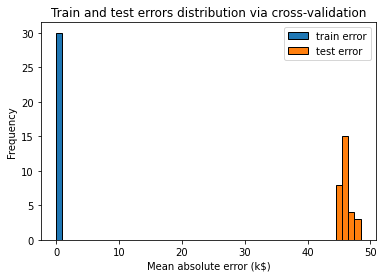

In [16]:
# again reloading data and rewriting code to keep things in one view
# this was already done earlier in this notebook
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

housing = fetch_california_housing(
    as_frame=True
)
data, target = housing.data, housing.target
target *= 100



regressor = DecisionTreeRegressor()

cv = ShuffleSplit(
    n_splits=30,
    test_size=0.2
)
cv_results = cross_validate(
    regressor,
    data,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=2
)
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()

scores[
    ["train error", "test error"]
] = -cv_results[
    ["train_score", "test_score"]
]

scores.plot.hist(
    bins=50,
    edgecolor="black"
)

plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

# Here, we observe a small training error (actually zero), meaning that the model is not under-fitting: 
# it is flexible enough to capture any variations present in the training set.

# However the significantly larger testing error tells us that the model is over-fitting: 
# the model has memorized many variations of the training set that could be considered "noisy" because 
# they do not generalize to help us make good prediction on the test set.

In [17]:
%%time
from sklearn.model_selection import validation_curve

max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    regressor,
    data,
    target,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)
train_errors, test_errors = -train_scores, -test_scores

CPU times: user 183 ms, sys: 81 ms, total: 264 ms
Wall time: 8.97 s


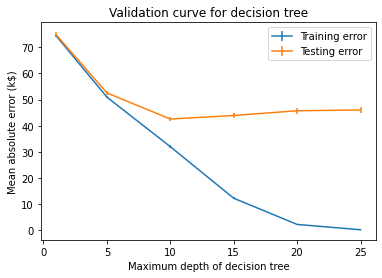

In [18]:
plt.errorbar(
    max_depth,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label='Training error'
)
plt.errorbar(
    max_depth,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label='Testing error'
)
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

###### What does the above validation curve reveal ?

The validation curve can be divided into three areas:

* For `max_depth < 10`, the decision tree is underfitting. The training error and, therefore, the testing error are both high. 
The model is too constrained and cannot capture much of the variability of the target variable.



* The region around `max_depth = 10` corresponds to the parameter for which the decision tree generalizes the best. It is flexible enough to capture a fraction of the variability of the target that generalizes while not memorizing all of the noise in the target.


* For `max_depth > 10`, the decision tree overfits. The training error becomes very small while the testing error increases. In this region, the model creates decisions specifically for noisy samples harming its ability to generalize to test data.


<br>

Note that for `max_depth = 10`, the model overfits a bit as there is a gap between the training and testing errors. Further, we can see that the variance of the errors is slight compared to their respective values.

It can potentially underfit a bit at the same time because the training error is still far from zero (more than 30 k$), meaning that the model might still be too constrained to model interesting parts of the data. 

However, the testing error is minimal, and this is what matters and the best compromise we could reach by just tuning this parameter.

<br>


##### Learning Curve

To understand the impact of the number of samples available for training on the generalization performance of a predictive model, it is possible to synthetically reduce the number of samples used to train the predictive model and check the training and testing errors.

We can acquire knowledge by plotting a curve called the learning curve. scikit-learn has `learning_curve` function that works with different sizes of samples.
We will use `learning_curve` in the above experiment and vary the size of the number of samples. 

<br>

Below we use the `learning_curve` for `DecisionTreeRegressor` 


the range for size of sample data is [0.1   0.325 0.55  0.775 1.   ]


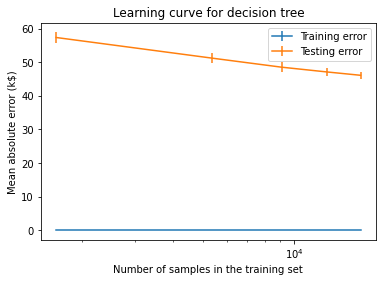

In [19]:
# again loading data to keep things in one view
# this was already loaded earlier in this notebook
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit


housing = fetch_california_housing(
    as_frame=True
)
data, target = housing.data, housing.target
target *= 100

regressor = DecisionTreeRegressor()


train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
print(
    f"the range for size of sample data is {train_sizes}"
)

cv = ShuffleSplit(
    n_splits=30,
    test_size=0.2
)
cv_results = learning_curve(
    regressor,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)

train_size, train_scores, test_scores = cv_results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

plt.errorbar(
    train_size,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training error"
)
plt.errorbar(
    train_size,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Testing error"
)
plt.legend()

plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for decision tree")


###### What does the above learning curve reveal? 
The trained model (i.e., decision tree) is overfitting the training data. Looking at the training error alone, we get an error of 0 k$. 


Looking at the testing error alone, we observe that the more samples added to the training set, the lower the testing error. 

Also, we are searching for the plateau of the testing error for which there is no benefit to adding samples anymore or assessing the potential gain of adding more samples into the training set.

If we achieve a plateau and adding new samples in the training set does not reduce the testing error, we might have reached the Bayes error rate using the available model. 

Using a more complex model might be the only possibility to reduce the testing error further.

*We can use the optimal value of `max_depth` as determined by the validation curve and get to the same conclusion, however in much obvious fashion.*

the range for size of sample data is [0.1   0.325 0.55  0.775 1.   ]


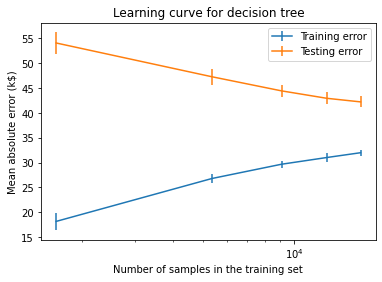

In [20]:
# again loading data to keep things in one view
# this was already loaded earlier in this notebook
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import learning_curve, ShuffleSplit
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

housing = fetch_california_housing(
    as_frame=True
)
data, target = housing.data, housing.target
target *= 100

regressor = DecisionTreeRegressor(max_depth=10)

train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
print(
    f"the range for size of sample data is {train_sizes}"
)

cv = ShuffleSplit(
    n_splits=30,
    test_size=0.2
)

cv_results = learning_curve(
    regressor,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)

train_size, train_scores, test_scores = cv_results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

plt.errorbar(
    train_size,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training error"
)
plt.errorbar(
    train_size,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Testing error"
)
plt.legend()

plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for decision tree")


#### QUIZ 2

**1. A model is overfitting when:**

a) both the train and test errors are high

b) train error is low but test error is high

c) train error is high but the test error is low 

d) both train and test errors are low

<br>

**2. Assuming that we have a dataset with little noise, a model is underfitting when:**

a) both the train and test errors are high 

b) train error is low but test error is high 

c) train error is high but the test error is low 

d) both train and test errors are low

<br>

**3. For a fixed training set, by sequentially adding parameters to give more flexibility to the model, we are more likely to observe:**

a) a wider difference between train and test errors

b) a reduction in the difference between train and test errors

c) an increased or steady train error

d) a decrease in the train error 

<br>

**4. For a fixed choice of model parameters, if we increase the number of labeled observations in the training set, are we more likely to observe:**

a) a wider difference between train and test errors
 
b) a reduction in the difference between train and test errors
 
c) an increased or steady train error
 
d) a decrease in the train error

<br>

**5. Polynomial models with a high degree parameter:**

a) always have the best test error (but can be slow to train)

b) underfit more than linear regression models

c) get lower training error than lower degree polynomial models

d) are more likely to overfit than lower degree polynomial models

<br>


**6. If we chose the parameters of a model to get the best overfitting/underfitting tradeoff, we will always get a zero test error.**

a) True

b) False

<br>


#### Bias and Variance

This section will try to relate the statistical concept of bias and variance to the machine learning concept of Underfitting and Overfitting. 

We will see that they are synonymous. 

Before we go further, let's put words to the bias-variance tradeoff. 

<br>

In statistics and machine learning, the bias-variance tradeoff is the property of a model - increasing the bias in the estimated parameters can reduce the variance of the parameter estimated across samples.

The bias-variance dilemma or bias-variance problem is the conflict in simultaneously minimizing these two sources of error, i.e., bias and variance, preventing supervised learning algorithms from generalizing beyond their training set.

* The bias error is an error from erroneous assumptions in the learning algorithm. \
High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

* The variance is an error from sensitivity to small fluctuations in the training set. \
A high variance may result from an algorithm modeling the random noise in the training data (overfitting).

The bias-variance decomposition analyzes a learning algorithm's expected generalization error concerning a particular problem as a sum of three terms, the bias, variance, and a quantity called the irreducible error, i.e., $\epsilon$, resulting from noise in the problem itself.

[source](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

When we work in machine learning on training data, we have access to a limited number of observations to build our training set. And this comes from the fact that it's usually costly to collect the data points and label the value of the target variable for each of those data points. 

Usually, the specific training set we have to train the model is small. Further, it is a random subset of all the possible observations for the phenomenon we are trying to model. 

Suppose we pick the example of the model that predicts the income level based on demographic data. In that case, we have access to a survey of a couple of thousands of people from whom we collect the data. And we hope that by training a model on this survey data, we can generalize to the general population of the United States, where we have hundreds of millions of people. 

So, we have small training sets. We try to make predictions for all the possible observations. But those tens of thousands of data points are taken at random in the general population in the US. 

How would our model change if had access to a different subset, not the one we observed?

What is the impact of this choice of the training set on the learned prediction function?

Say we have a model where we try to predict Y on an X-Y axis from the X-axis. 
And there is a ground truth model that we do not have access to, f*, plus some noise that this data generates.

***

**Overfit/Variance** 

Consider we have access to just 30 data points for our training. Suppose we fit our degree 9 polynomial on this. In that case, you see that we have this overfitting model with those extreme predictions on the edges. We can represent this model as a blue arrow on a target. 

Ideally, the best model would be in the center. 

So the f* model here would be in the center and have zero prediction errors. 

And this model is making some prediction errors on the edges in a different manner, left and right. 

And suppose we get access to a different training set for the same problem. In that case, we will get a different model and thus make very different predictions on the edges and a very different location on the target. But errors from the center, i.e., the distance to the center (or the prediction error), will be approximately the same as the previous one. This one is not necessarily better than this one. They are just different. And if we resample this data set many times, we get many different functions. 

We see that is overfitting as it is trying to go through the specific data points and capture the noise and is not related to the general shape of the generative process.

So if we repeat this many times, we get plenty of models that are very different from one another. But you see that the kind of errors that they make are not necessarily the same. 

![no order at all](../figures/variance.png)

Suppose we repeat the process with a different set of training. We will have under-prediction and over-prediction errors, but we will not make systematic errors. 

![overfit variance](../figures/variance_4.png)

So the average model would probably be good. But the individual models that we get by training on different training sets are very different from one another. They are all bad. 

And they are all overfitting. So this problem is what we call the variance of the estimated model, which is a significant dependency on slight variations of the training set. 

***

**Underfit/Bias**

On the other side of the spectrum, we have another problem, which is the problem of bias. 

We fit another family of models on the same data, just linear models, straight lines, or degree 1 polynomial. 

And we can see that this model is making some prediction errors. And because we are making some prediction errors, the model is not located at the center of the target because we have some test errors. 

If we change the training set sample again, we see that the function does not move much this time. So the prediction function is not impacted much. 

You see, on the target, it doesn't move much. And here, the slope is almost the same. 

And we can do another one here. 

![some order](../figures/bias.png)

If we repeat this many times, all the models make some errors. 

But what is interesting here is that the errors are groups. They make the same kind of errors. In particular, here, you see that they all underpredict those values. 

![underfit bias](../figures/bias_4.png)

In this region in the center, they over-predict all of them. None of them can predict a small value here. And here again, we have under predictions. So on the target, those models suffer from a bias that moves them away from the center on average. 

***

<br>


To summarize underfit versus overfit, or bias versus variance, the bias is that all the models make a systematic prediction error. And so, on average, they are not good. 

Whereas the variance is that maybe on average, they are good, they are centered around the optimal model. Still, they have a high sensitivity to the specific training set that we have used to estimate those models. 

And therefore, they also have lousy test errors.

![bias and variance](../figures/b_vs_v.png)


**Important Note**

![bias vs bias](../figures/bias_vs_bias.png)


<br>

[source](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)


##### Intutive explanation of Bias and Variance and easy proof without $\varepsilon$

Below is another intuitive visual representation of Bais and variance.

![bias and variance](../figures/easy_bias_variance.png)

$\hat{\theta}$ is the point estimation of the predicted target or prediction of a given model fit with a certain training set

$\operatorname{E}$ is the Expectation over the training sets ( training sets drawn from the same distribution of the population )

$\operatorname{E}[\hat{\theta}]$ is the average of the prediction of a given data in the test set.  

Different arrow paths are different models trained on different training sets from the same population distribution.

Where the arrow hit is the prediction for a given data point, and the target is the "true target" value for the given data point.

The goal of the model is to predict this target value or hit this target value. 

![variance](../figures/easy_variance.png)

Intutivly the  $\operatorname{MSE}$ will be $\left[(\hat{\theta}-\theta)^2\right]$

<br>


**ML representation of the same concept**

$ y = f(x) $ is the true target 

<br>

$\hat{y} = \hat{f}(x) = h(x)$ is the prediction 

<br>

$ S = (y - \hat{y})^{2}$ is the squared error 

<br>

and $\operatorname{MSE}$ will be equal to the Expectation of $S$, i.e., Average of $S$

<br>

$\operatorname{MSE} = \operatorname{E}[S] = \operatorname{E}(y - \hat{y})^{2}$

<br>

To reiterate the Expectation is over the training data, i.e., the average estimator from different training samples

<br>

$ S = (y - \hat{y})^{2} = (y - \operatorname{E}[\hat{y}] +  \operatorname{E}[\hat{y}]  + \hat{y})^{2}$


$\qquad\qquad\qquad = (y - \operatorname{E}[\hat{y}])^{2} +  (\operatorname{E}[\hat{y}] - \hat{y})^{2}  - 2(y - \operatorname{E}[\hat{y}])(\operatorname{E}[\hat{y}] - \hat{y})$

<br>


Now we will apply the Expecation to each term in equation of form $a^{2} + b^{2} -2ab$ to deduce $\operatorname{MSE}$


$ \operatorname{E}[S] = \operatorname{E}[(y - \hat{y})^{2}] = \operatorname{E}\left[(y - \operatorname{E}[\hat{y}])^{2} +  (\operatorname{E}[\hat{y}] - \hat{y})^{2}  - 2(y - \operatorname{E}[\hat{y}])(\operatorname{E}[\hat{y}] - \hat{y})\right] $

<br>

Note that $(y - \operatorname{E}[\hat{y}])$ is constant term, so average or expecation doesnt change anything.


<br>

$\operatorname{E}\left[2(y - \operatorname{E}[\hat{y}])(\operatorname{E}[\hat{y}] - \hat{y})\right] \quad = 2\operatorname{E}\left[(y - \operatorname{E}[\hat{y}])(\operatorname{E}[\hat{y}] - \hat{y})\right]$

$\qquad\qquad\qquad\qquad\qquad\qquad = 2(y - \operatorname{E}[\hat{y}])\operatorname{E}\left[(\operatorname{E}[\hat{y}] - \hat{y})\right]$

$\qquad\qquad\qquad\qquad\qquad\qquad = 2(y - \operatorname{E}[\hat{y}]) (\operatorname{E}[\operatorname{E}[\hat{y}]] - \operatorname{E}[\hat{y}])$

$\qquad\qquad\qquad\qquad\qquad\qquad = 2(y - \operatorname{E}[\hat{y}]) (\operatorname{E}[\hat{y}] - \operatorname{E}[\hat{y}])$

$\qquad\qquad\qquad\qquad\qquad\qquad = 0$


<br>

$\operatorname{E}(y - \hat{y})^{2} = (y - \operatorname{E}[\hat{y}])^{2} + \operatorname{E} \left [(\operatorname{E}[\hat{y}] - \hat{y})\right]$

<br>

$\operatorname{E}(y - \hat{y})^{2} = \operatorname{Bias}^{2} + \operatorname{Var}$

<br>

An awesome resource to understand bias and variance [MLU-explains](https://mlu-explain.github.io/bias-variance/)



[source](https://youtu.be/r25dWiyDPQA)



##### Bias, Variance and MSE - with error terms

*** 

The MSE of an estimator $\hat{\theta}$ with respect to an unknown parameter $\theta$ is defined as:

<br>

$\operatorname{MSE}(\hat{\theta})=\operatorname{E}_{\theta}\left[(\hat{\theta}-\theta)^2\right]$

<br>

*"the estimator is the method selected to obtain an estimate of an unknown parameter"*

This definition depends on the unknown parameter, but the MSE is ''a priori'' a property of an estimator. 

The MSE could be a function of unknown parameters, in which case any ''estimator'' of the MSE based on estimates of these parameters would be a function of the data (and thus a random variable). 

*If the estimator $\hat{\theta}$ is derived as a sample statistic and is used to estimate some population parameter, then the expectation is with respect to the sampling distribution of the sample statistic.*

The MSE can be written as the sum of the $\operatorname{Var}$ of the estimator and the squared $\operatorname{Bias}$ of the estimator, providing a useful way to calculate the MSE and implying that in the case of unbiased estimators, the $\operatorname{MSE}$ and variance are equivalent.

$\operatorname{MSE}(\hat{\theta})=\operatorname{Var}_{\theta}(\hat{\theta})+ \operatorname{Bias}(\hat{\theta},\theta)^2$

<br>

**Derivation**

$\operatorname{MSE}(\hat{\theta}) = \operatorname{E}_{\theta} \left [(\hat{\theta}-\theta)^2 \right ]$

$\qquad\qquad  = \operatorname{E}_{\theta}\left[\left(\hat{\theta}-\operatorname{E}_{\theta} [\hat\theta]+\operatorname{E}_{\theta}[\hat\theta]-\theta\right)^2\right]$ 

$\qquad\qquad = \operatorname{E}_{\theta}\left[\left(\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta]\right)^2 +2\left (\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta] \right ) \left (\operatorname{E}_{\theta}[\hat\theta]-\theta \right )+\left( \operatorname{E}_{\theta}[\hat\theta]-\theta \right)^2\right] $

$\qquad\qquad  = \operatorname{E}_{\theta}\left[\left(\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta]\right)^2\right]+\operatorname{E}_{\theta}\left[2 \left (\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta] \right ) \left (\operatorname{E}_{\theta}[\hat\theta]-\theta \right ) \right] + \operatorname{E}_{\theta}\left [ \left(\operatorname{E}_{\theta}[\hat\theta]-\theta\right)^2 \right]$

$\qquad\qquad  = \operatorname{E}_{\theta}\left[\left(\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta]\right)^2\right]+ 2 \left(\operatorname{E}_{\theta}[\hat\theta]-\theta\right) \operatorname{E}_{\theta}\left[\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta] \right] +  \left(\operatorname{E}_{\theta}[\hat\theta]-\theta\right)^2 \qquad\qquad \operatorname{E}_{\theta}[\hat\theta]-\theta = \text{const.}$

$\qquad\qquad = \operatorname{E}_{\theta}\left[\left(\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta]\right)^2\right]+ 2 \left(\operatorname{E}_{\theta}[\hat\theta]-\theta\right) \left ( \operatorname{E}_{\theta}[\hat{\theta}]-\operatorname{E}_{\theta}[\hat\theta] \right )+ \left(\operatorname{E}_{\theta}[\hat\theta]-\theta\right)^2 \qquad\qquad \operatorname{E}_{\theta}[\hat\theta] = \text{const.}$

$\qquad\qquad  = \operatorname{E}_{\theta}\left[\left(\hat{\theta}-\operatorname{E}_{\theta}[\hat\theta]\right)^2\right]+\left(\operatorname{E}_{\theta}[\hat\theta]-\theta\right)^2$

$\qquad\qquad  = \operatorname{Var}_{\theta}(\hat\theta)+ \operatorname{Bias}_{\theta}(\hat\theta,\theta)^2$


*** 

Suppose that we have a training set consisting of a set of points $x_1, \dots, x_n$ and real values $y_i$ associated with each point $x_i$. 

We assume that there is a function with noise $y = f(x) + \varepsilon$, where the noise, $varepsilon$, has zero mean and variance $\sigma^2$.

We want to find a function $\hat{f}(x;D)$, that approximates the true function $f(x)$ "as well as possible", \
by means of some learning algorithm based on a training dataset (sample) $D=\{(x_1,y_1) \dots, (x_n, y_n)\}$. 

We make "as well as possible" precise by measuring the mean squared error between $y$ and $\hat{f}(x;D)$:\
we want $(y - \hat{f}(x;D))^2$ to be minimal, both for $x_1, \dots, x_n$ and *for points outside of our sample*. 

Of course, we cannot hope to do so perfectly, since the $y_i$ contain noise $\varepsilon$; 

this means we must be prepared to accept an *irreducible error* in any function we come up with.


Finding an $\hat{f}$ that generalizes to points outside of the training set can be done with any of the countless algorithms used for supervised learning.\
As shown whichever function $\hat{f}$ we select, we can decompose its expected  error on an unseen sample $x$ as follows


$\operatorname{E}_{D, \varepsilon} \Big[\big(y - \hat{f}(x;D)\big)^2\Big] = \Big(\operatorname{Bias}_D\big[\hat{f}(x;D)\big] \Big) ^2 + \operatorname{Var}_D\big[\hat{f}(x;D)\big] + \sigma^2$

where 
<br>

$\operatorname{Bias}_D\big[\hat{f}(x;D)\big] = \operatorname{E}_D\big[\hat{f}(x;D)\big] - f(x)$

and 
<br>

$\operatorname{Var}_D\big[\hat{f}(x;D)\big] = \operatorname{E}_D[\big(\operatorname{E}_D[\hat{f}(x;D)] - \hat{f}(x;D)\big)^2].$

<br>

For notational convenience, we abbreviate $f = f(x)$, $\hat{f} = \hat{f}(x;D)$ and we drop the $D$ subscript on our expectation operators.

<br>

First, recall that, by definition, for any random variable $X$, we have

<br>

$\operatorname{Var}[X] = \operatorname{E}[X^2] - \operatorname{E}[X]^2.$

<br>

Rearranging, we get:

<br>

$\operatorname{E}[X^2] = \operatorname{Var}[X] + \operatorname{E}[X]^2.$

<br>

Since $f$ is deterministic, i.e. independent of $D$,

<br>

$\operatorname{E}[f] = f$

<br>

Thus, given $y = f + \varepsilon$ and $\operatorname{E}[\varepsilon] = 0$ 

<br>

(because $\varepsilon$ is noise), implies $\operatorname{E}[y] = \operatorname{E}[f + \varepsilon] = \operatorname{E}[f] = f.$

<br>

Also, since $\operatorname{Var}[\varepsilon] = \sigma^2,$

<br>

$ \operatorname{Var}[y] = \operatorname{E}[(y - \operatorname{E}[y])^2] = \operatorname{E}[(y - f)^2] = \operatorname{E}[(f + \varepsilon - f)^2] = \operatorname{E}[\varepsilon^2] = \operatorname{Var}[\varepsilon] + \operatorname{E}[\varepsilon]^2  = \sigma^2 + 0^2 = \sigma^2.$

<br>

Thus, since $\varepsilon$ and $\hat{f}$ are independent, we can write

<br>

$\begin{align}
\operatorname{E}\big[(y - \hat{f})^2\big]
 & = \operatorname{E}\big[(f+\varepsilon  - \hat{f} )^2\big] \\[5pt]
 & = \operatorname{E}\big[(f+\varepsilon  - \hat{f} +\operatorname{E}[\hat{f}]-\operatorname{E}[\hat{f}])^2\big] \\[5pt]
 & = \operatorname{E}\big[(f-\operatorname{E}[\hat{f}])^2\big]+\operatorname{E}[\varepsilon^2]+\operatorname{E}\big[(\operatorname{E}[\hat{f}]- \hat{f})^2\big] 
+2\operatorname{E}\big[(f-\operatorname{E}[\hat{f}])\varepsilon\big]
+2\operatorname{E}\big[\varepsilon(\operatorname{E}[\hat{f}]- \hat{f})\big]
+2\operatorname{E}\big[(\operatorname{E}[\hat{f}]- \hat{f})(f-\operatorname{E}[\hat{f}])\big] \\[5pt]
 & = (f-\operatorname{E}[\hat{f}])^2+\operatorname{E}[\varepsilon^2]+\operatorname{E}\big[(\operatorname{E}[\hat{f}]- \hat{f})^2\big] 
+2(f-\operatorname{E}[\hat{f}])\operatorname{E}[\varepsilon]
+2\operatorname{E}[\varepsilon]\operatorname{E}\big[\operatorname{E}[\hat{f}]- \hat{f}\big]
+2\operatorname{E}\big[\operatorname{E}[\hat{f}]- \hat{f}\big](f-\operatorname{E}[\hat{f}]) \\[5pt]
 & = (f-\operatorname{E}[\hat{f}])^2+\operatorname{E}[\varepsilon^2]+\operatorname{E}\big[(\operatorname{E}[\hat{f}]- \hat{f})^2\big]\\[5pt]
 & = (f-\operatorname{E}[\hat{f}])^2+\operatorname{Var}[\varepsilon]+\operatorname{Var}\big[\hat{f}\big]\\[5pt]
 & = \operatorname{Bias}[\hat{f}]^2+\operatorname{Var}[\varepsilon]+\operatorname{Var}\big[\hat{f}\big]\\[5pt]
 & = \operatorname{Bias}[\hat{f}]^2+\sigma^2+\operatorname{Var}\big[\hat{f}\big].
\end{align}$

<br>

Finally, MSE loss function (or negative log-likelihood) is obtained by taking the expectation value over $x\sim P$ : 

<br>

$ \text{MSE} = \operatorname{E}_x\bigg\{\operatorname{Bias}_D[\hat{f}(x;D)]^2+\operatorname{Var}_D\big[\hat{f}(x;D)\big]\bigg\} + \sigma^2. $

[source](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Bias%E2%80%93variance_decomposition_of_mean_squared_error)

[source](https://en.wikipedia.org/wiki/Mean_squared_error#Proof_of_variance_and_bias_relationship)

#### QUIZ 3

**1. what kind of bias and variance below image represent?**

![1](../figures/q3_1.png)

a) low bias

b) low variance

c) high bias

d) high variance 

<br>

**2. what kind of bias and variance below image represent?**

![2](../figures/q3_2.png)

a) low bias

b) low variance

c) high bias

d) high variance 

<br>

**3. what kind of bias and variance below image represent?**

![3](../figures/q3_3.png)

a) low bias

b) low variance

c) high bias

d) high variance 

<br>

**4. what kind of bias and variance below image represent?**

![4](../figures/q3_4.png)

a) low bias

b) low variance

c) high bias

d) high variance 

<br>

[source](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)

<br>



#### HyperParameter Tuning 


Learning of a predictive model is driven by a set of internal parameters and training data. These internal parameters are called hyperparameters and are specific for each family of models. 
 
*Hyperparameters are the parameters that can be used to control the learning process.*

The user specifies hyperparameters, often manually tuned (or by an exhaustive automatic search), and cannot be estimated from the data. 
 
They should not be confused with the fitted parameters resulting from the training. These fitted parameters are recognizable in scikit-learn because they are spelled with a final underscore `_` for instance, `model.coef_`.

Sklearn provides an easy interface to get and set the hyperparameters via `get_params` and `set_params` functions.





In [21]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv")

target_name = "class"
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

target = adult_census[target_name]
data = adult_census[numerical_columns]

In [22]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [23]:
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [24]:
from sklearn import set_config

set_config(display="diagram")

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", LogisticRegression())
])

cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(
    f"Accuracy score via cross-validation:\n"
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)

Accuracy score via cross-validation:
0.800 +/- 0.003


In [26]:
# as you can see that the name we gave to the pipeline steps
# is appended to the hyperparameters name so that one can easily identify them
# also notice the double underscores i.e. __
for parameter in model.get_params():
    print(parameter)

memory
steps
verbose
preprocessor
classifier
preprocessor__copy
preprocessor__with_mean
preprocessor__with_std
classifier__C
classifier__class_weight
classifier__dual
classifier__fit_intercept
classifier__intercept_scaling
classifier__l1_ratio
classifier__max_iter
classifier__multi_class
classifier__n_jobs
classifier__penalty
classifier__random_state
classifier__solver
classifier__tol
classifier__verbose
classifier__warm_start


In [27]:
type(model.get_params())

dict

In [28]:
# the hyperparameter used the default value of C as 1
model.get_params()['classifier__C']

1.0

In [29]:
# now we can use the set_param function to systamtically
#  change the  value of the hyperparameters 
for index, C in enumerate([1e-3, 1e-2, 1e-1, 1, 10]):
    model.set_params(
        classifier__C=C
    )
    cv_results = cross_validate(model, data, target)
    scores = cv_results["test_score"]
    print(f"Trail {index+1} accuracy score via cross-validation with C={C}:\n"
          f"{scores.mean():.3f} +/- {scores.std():.3f}")

Trail 1 accuracy score via cross-validation with C=0.001:
0.787 +/- 0.002
Trail 2 accuracy score via cross-validation with C=0.01:
0.799 +/- 0.003
Trail 3 accuracy score via cross-validation with C=0.1:
0.800 +/- 0.003
Trail 4 accuracy score via cross-validation with C=1:
0.800 +/- 0.003
Trail 5 accuracy score via cross-validation with C=10:
0.800 +/- 0.003


#### Hyperparameter Tuning with Grid-Search


We used one for loop for each hyperparameter to find the best combination over a fixed grid of values. 

`GridSearchCV` is a scikit-learn class that implements a similar logic with less repetitive code but is just as costly or time-consuming as using for loops.

The `GridSearchCV` estimator takes a `param_grid` parameter which defines all hyperparameters and their associated values. 

The `GridSearchCV` will be in charge of creating all possible combinations and testing them.

The number of combinations will be equal to the product of the number of values to explore for each parameter (e.g., in our example it will be 4 x 3 combinations). 

Thus, adding new parameters with their associated values to be explored has become rapidly computationally expensive.

*The best combination is selected by keeping the combination leading to the best mean cross-validated score.*

Once the grid-search is fitted, it can be used as any other predictor by calling `predict` and `predict_proba`. 

**Internally, it will use the model with the best parameters found during `fit`.**

<br>

Remember that `GridSearchCV` uses a cross-validate approach and accepts a `cv` flag.

<code>
cv : int, cross-validation generator or an iterable, default=None

Determines the cross-validation splitting strategy. Possible inputs for cv are:

- None, to use the default 5-fold cross-validation,

- integer, to specify the number of folds in a (Stratified)KFold,

- CV splitter,

- An iterable yielding (train, test) splits as arrays of indices.

For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. 

In all other cases, KFold is used. These splitters are instantiated with shuffle=False, so the splits will be the same across calls.

</code>

<br>

We will use a tree-based model as a classifier (i.e. `HistGradientBoostingClassifier`) along with `GridSearchCV`

That means:
* Numerical variables don't need scaling;
* Categorical variables can be dealt with by an OrdinalEncoder even if the coding order is not meaningful;
* For tree-based models, the OrdinalEncoder avoids having high-dimensional representations.

<br>

[source](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn-model-selection-gridsearchcv)



In [30]:
data = adult_census.drop(columns=[target_name, "education-num"])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42
)


categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)


preprocessor = ColumnTransformer(
    [('cat_preprocessor', categorical_preprocessor, categorical_columns)],
    remainder='passthrough',
    sparse_threshold=0
)

model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier",HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4))
    ]
)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

In [32]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__learning_rate': (0.01, 0.1, 1, 10),
    'classifier__max_leaf_nodes': (3, 10, 30)
}
model_grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    n_jobs=2,
    cv=5,
    verbose=1
)
model_grid_search.fit(data_train, target_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 11.8 s, sys: 7.64 s, total: 19.4 s
Wall time: 1min 2s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('cat_preprocessor',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country'])])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                                       random_state=42))]),
             n_jobs=2,
             param_grid={'classifier__learning_rate': (0.01, 0.1, 1, 10),
                         'classifier__max_leaf_nodes': (3, 10, 30)},
             verbose=1)

In [33]:
accuracy = model_grid_search.score(
    data_test,
    target_test
)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.88


In [34]:
# Get predictions for the 5 first samples using the estimator with the best parameters.
model_grid_search.predict(data_test.iloc[0:5])

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)

In [35]:
# we can know about these parameters by looking at the best_params_ attribute.
print(
    f"The best set of parameters is: "
    f"{model_grid_search.best_params_}"
)

The best set of parameters is: {'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}


In [36]:
# we can inspect all results which are stored in the attribute cv_results_ of the grid-search
cv_results = pd.DataFrame(
    model_grid_search.cv_results_
).sort_values(
    "mean_test_score",
    ascending=False
)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,3.551062,0.096290,0.041365,0.005490,0.1,30,"{'classifier__learning_rate': 0.1, 'classifier...",0.869387,0.872099,0.873464,0.869369,0.870734,0.871011,0.001588,1
4,1.485611,0.116601,0.050617,0.006075,0.1,10,"{'classifier__learning_rate': 0.1, 'classifier...",0.865702,0.871826,0.870325,0.864182,0.870188,0.868445,0.002956,2
7,0.272189,0.071677,0.022422,0.001762,1,10,"{'classifier__learning_rate': 1, 'classifier__...",0.861744,0.868550,0.865001,0.858449,0.863500,0.863449,0.003357,3
6,0.281999,0.110897,0.029666,0.007900,1,3,"{'classifier__learning_rate': 1, 'classifier__...",0.865566,0.860087,0.868550,0.862408,0.848621,0.861047,0.006839,4
8,0.456991,0.141987,0.022252,0.001763,1,30,"{'classifier__learning_rate': 1, 'classifier__...",0.859697,0.856129,0.864728,0.853399,0.859814,0.858753,0.003828,5


In [37]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
print(
    f"columns in results are {column_results}"
)

column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

print(
    f"updated columns in results are {column_results}"
)

def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

columns in results are ['param_classifier__learning_rate', 'param_classifier__max_leaf_nodes']
updated columns in results are ['param_classifier__learning_rate', 'param_classifier__max_leaf_nodes', 'mean_test_score', 'std_test_score', 'rank_test_score']


,learning_rate,max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
5,0.1,30,0.871011,0.001588,1
4,0.1,10,0.868445,0.002956,2
7,1,10,0.863449,0.003357,3
6,1,3,0.861047,0.006839,4
8,1,30,0.858753,0.003828,5
3,0.1,3,0.854577,0.002054,6
2,0.01,30,0.846578,0.001669,7
1,0.01,10,0.817996,0.002148,8
0,0.01,3,0.796675,0.001855,9
9,10,3,0.283476,0.005123,10


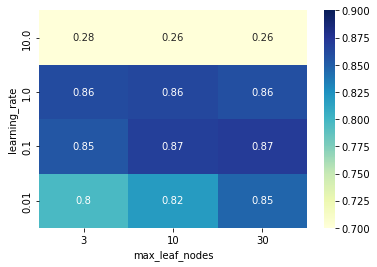

In [38]:
import seaborn as sns

pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score",
    index=["learning_rate"],
    columns=["max_leaf_nodes"]
)

"""
The below plot highlights the following things:

for too high values of learning_rate, the generalization performance of the model is degraded and adjusting the value of max_leaf_nodes cannot fix that problem;

outside of this pathological region, we observe that the optimal choice of max_leaf_nodes depends on the value of learning_rate;

in particular, we observe a "diagonal" of good models with an accuracy close to the maximal of 0.87: 
when the value of max_leaf_nodes is increased, one should decrease the value of learning_rate accordingly to preserve a good accuracy.

"""

ax = sns.heatmap(
    pivoted_cv_results,
    annot=True,
    cmap="YlGnBu",
    vmin=0.7,
    vmax=0.9
)
ax.invert_yaxis()


#### QUIZ 4

Given `model` defined by ... 

<code>
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
</code>

**1. how do you get the value of the C parameter?**

a) model.get_parameters()['C'] 

b) model.get_params()['C'] 

c) model.get_params('C') 

d) model.get_params['C']

<br>

**2. how do you set the value of the C parameter to 5?**

a) model.set_params('C', 5)

b) model.set_params({'C': 5})

c) model.set_params()['C'] = 5

d) model.set_params(C=5)

<br>


Given `model` defined by ...

<code>

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

</code>

**3.how do you set the value of the C parameter of the LogisticRegression component to 5?**


a) model.set_params(C=5)

b) model.set_params(logisticregression__C=5)

c) model.set_params(classifier__C=5)

d) model.set_params(classifier--C=5)

<br>


#### HyperParameter Tuning with Randomized-Search

We learned to use a grid-search approach to search for the best hyperparameters to maximize a predictive model's generalization performance.

However, a grid-search approach has limitations. 

*It does not scale when the number of tuned parameters is large.*

*Also, the grid will impose a regularity during the search, which might be problematic.*

*** 

We will learn about another method to tune hyperparameters called **randomized search**.

With the `GridSearchCV` estimator, the parameters need to be specified explicitly. 

Instead, we can randomly generate the parameter candidates, and such an approach avoids the regularity of the grid. Hence, adding more evaluations can increase the resolution in each direction, which is the case in the frequent situation where some hyperparameters are not very important. Indeed, the number of evaluation points needs to be divided across the two different hyperparameters.

With a grid, the danger is that the region of good hyperparameters falls between the grid line. This region is aligned with the grid, given that hyperparameter 2 has a weak influence. 

![randomize the search](../figures/grid_vs_random_search.png)

Instead, a stochastic search will sample hyperparameter 1 independently from hyperparameter 2 and find the optimal region.

The `RandomizedSearchCV` class allows for such a stochastic search. 

It is used similarly to the `GridSearchCV` but the sampling distributions need to be specified instead of the parameter values. 

*** 


Remeber that `RandomizedSearchCV` will use cross-validate approach, and accepts a `cv` flag.

<code>

cv : int, cross-validation generator or an iterable, default=None

Determines the cross-validation splitting strategy. Possible inputs for cv are:

- None, to use the default 5-fold cross validation,

- integer, to specify the number of folds in a (Stratified)KFold,

- CV splitter,

- An iterable yielding (train, test) splits as arrays of indices.

For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. 

In all other cases, KFold is used. These splitters are instantiated with shuffle=False so the splits will be the same across calls.


</code>

For instance, we will draw candidates using a log-uniform distribution because we are interested in taking positive values with a natural log scaling.


*Random search (with `RandomizedSearchCV`) is typically beneficial compared to grid search (with `GridSearchCV`) to optimize three or more hyperparameters.*

[source](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn-model-selection-randomizedsearchcv)

In [39]:
# reloading/repeating code to keep code in same view 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline


adult_census = pd.read_csv("../datasets/adult-census.csv")
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name, "education-num"])



data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42
)

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
preprocessor = ColumnTransformer(
    [
        ('cat_preprocessor', categorical_preprocessor, categorical_columns)
    ],
    remainder='passthrough',
    sparse_threshold=0
)

model = Pipeline(
    [
    ("preprocessor", preprocessor),
    (
        "classifier",
        HistGradientBoostingClassifier(
            random_state=42,
            max_leaf_nodes=4
        )
    ),
    ]
)

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

In [40]:
%%time
"""
We will optimize 5 parameters, 2 of which are same as GridSearchCV

1. l2_regularization: it corresponds to the strength of the regularization;

2. min_samples_leaf: it corresponds to the minimum number of samples required in a leaf;

3. max_bins: it corresponds to the maximum number of bins to construct the histograms.

4. learning_rate: it corresponds to the speed at which the gradient-boosting will correct the residuals at each boosting iteration;

5. max_leaf_nodes: it corresponds to the maximum number of leaves for each tree in the ensemble.

"""
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)



from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'classifier__l2_regularization': loguniform(1e-6, 1e3),
    'classifier__learning_rate': loguniform(0.001, 10),
    'classifier__max_leaf_nodes': loguniform_int(2, 256),
    'classifier__min_samples_leaf': loguniform_int(1, 100),
    'classifier__max_bins': loguniform_int(2, 255),
}

model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=2,
    verbose=1,
)
model_random_search.fit(data_train, target_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
CPU times: user 15min 52s, sys: 10min 40s, total: 26min 33s
Wall time: 8min 45s


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('cat_preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
                                                                                'race',
                                                                                'sex',
                                                                                'native-country'])])),
                                             ('classifier',
                                              Hi...
                   param_distributions={'classifier__l2_regularization': <scipy.stats._distn_infrastructure.rv_frozen object at 0x17fc94910>,
                                        'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x17f715960>,
                                        'classifier__max_bins': <__main__.loguniform_int object at 0x17d5cc130>,
                                        'classifier__max_leaf_nodes': <__main__.loguniform_int object at 0x17d5cd6c0>,
                                        'classifier__min_samples_leaf': <__main__.loguniform_int object at 0x17d5ce290>},
                   verbose=1)

In [41]:
from pprint import pprint

accuracy = model_random_search.score(
    data_test,
    target_test
)

print(
    f"The test accuracy score of the best model is "
    f"{accuracy:.2f}"
)

print("The best parameters are:")
pprint(model_random_search.best_params_)

The test accuracy score of the best model is 0.88
The best parameters are:
{'classifier__l2_regularization': 0.0010853921397571927,
 'classifier__learning_rate': 0.21426002022703367,
 'classifier__max_bins': 197,
 'classifier__max_leaf_nodes': 21,
 'classifier__min_samples_leaf': 12}


In [42]:
column_results = [
    f"param_{name}" for name in param_distributions.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False)
cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,l2_regularization,learning_rate,max_leaf_nodes,min_samples_leaf,max_bins,mean_test_score,std_test_score,rank_test_score
13,0.001085,0.21426,21,12,197,0.868881,0.002324,1
31,0.000011,0.034353,74,3,189,0.867134,0.001341,2
20,85.376222,1.046119,61,3,239,0.863749,0.000733,3
27,419.755678,0.081039,23,3,50,0.854222,0.000932,4
10,0.000011,0.058322,6,38,74,0.851656,0.000222,5
9,4.661611,1.525567,23,64,133,0.851110,0.000706,6
17,0.000146,0.05682,194,37,19,0.850154,0.000031,7
14,9.567792,0.016018,217,77,40,0.847752,0.000195,8
41,23.468346,0.059025,8,86,15,0.846223,0.000195,9
8,0.774,0.018426,110,59,15,0.843411,0.000932,10


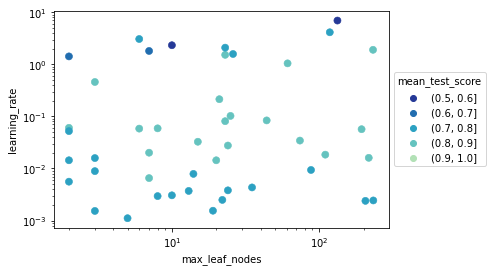

In [43]:
import seaborn as sns
import numpy as np

df = pd.DataFrame(
    {
        "max_leaf_nodes": cv_results["max_leaf_nodes"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None,
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5))

In [44]:
import numpy as np
import plotly.express as px

fig = px.parallel_coordinates(
    cv_results.apply(
        {
            "learning_rate": lambda x : np.log10(x.astype(np.float64)),
            "max_leaf_nodes": lambda x : np.log2(x.astype(np.int64)),
            "max_bins": lambda x : np.log2(x.astype(np.int64)),
            "min_samples_leaf": lambda x : np.log10(x.astype(np.float64)),
            "l2_regularization": lambda x : np.log10(x.astype(np.float64)),
            "mean_test_score": lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

#### QUIZ 5

**1.What does CV stand for in GridSearchCV and why?**

a) cross-validation : once we found the best parameters we estimate the model performance through cross-validation on the full data

b) circular values: we do a permutation of all the possible parameter value combinations

c) cross-validation: the score of each combination of parameters on the grid is computed by using an internal cross-validation procedure

d) contribution value : we estimate how much each parameter contributes to the model generalization performance


<br>

**2.Select the true statements about RandomizedSearchCV and GridSearchCV below:**

a) RandomizedSearchCV has a fixed computation budget through its n_iter parameter

b) RandomizedSearchCV allows to test all the combinations of a fixed set of parameter values

c) GridSearchCV can become very computationally intensive when the number of parameters grows

d) both GridSearchCV and RandomizedSearchCV have the attributes cv_results_ and best_params_ 

e) both GridSearchCV and RandomizedSearchCV can use probability distributions to draw parameter values from

<br>

Given `pipeline` defined by:

<code>

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris



X, y = load_iris(return_X_y=True)

pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = ...  # complete this line in your answer

model = GridSearchCV(
    pipeline,
    param_grid=param_grid
).fit(X, y)

model.best_params_

</code>

**3. If we want to find the best C through `GridSearchCV` which of the below is the currect answer to set the `param_grid` with values as `0.1, 1, and 10` ?**

a) param_grid = {'logisticregression__C': [0.1, 1, 10]}

b) param_grid = {'classifier__C': [0.1, 1, 10]}

c) param_grid = {'classifier__C': 0.1, 'classifier__C': 1, 'classifier__C': 10}

d) param_grid = {'C': [0.1, 1, 10]}

<br>


#### Cross-Validation Returns

Though we learned two approaches to tune hyperparameters, we did not present a proper framework to evaluate the tuned models. 

Instead, we focused on the mechanism used to find the best set of parameters. Thus, we look at the cross-validation again from the lens of hyperparameters tuning while evaluating models.

When calling the fit method for `GridSearchCV`, the model embedded in the grid-search is trained with every possible combination of parameters resulting from the parameter grid. The best combination is selected by keeping the combination leading to the best mean cross-validated score.

In the case of `RandomizedSearchCV`, the cross-validation follows the same approach. 

The mean and standard deviation of the scores computed by the cross-validation in the `GridSearchCV` is potentially not reasonable estimates of the generalization performance. We could primarily obtain the generalization performance by refitting a model with the best combination of hyper-parameter values on the full dataset.

*Note that scikit-learn automatically performs this refit by default when calling model_grid_search.fit.*

This refitted model is trained with more data than the different models trained internally during the cross-validation of the `GridSearchCV`.

Therefore, we use knowledge from the entire dataset to decide our model's hyper-parameters and train the refitted model.

And thus, one must apply techniques to evaluate the refitted model on unseen data.

<br>

*** 

**1. Single train-test split.**

We first split the data into test and train sets.

The selection of the best hyperparameters is made only on the train set from the initial train-test split. 

Then, we evaluate the generalization performance of our tuned model on the left-out test set, demonstrated schematically below.

![Cross-validation tuning with test train split](../figures/cross_validation_train_test_diagram.png)

This figure shows the K-fold cross-validation strategy using n_splits=5 to split further the train set coming from a train-test split. 
The procedure trains a model on all the red samples for each cross-validation split. It then evaluates the score of a given set of hyperparameters on the green samples. 
The best hyper-parameters are selected based on those intermediate scores. Then a final model tuned with those hyper-parameters is fitted on the concatenation of the red and green samples and evaluated on the blue samples.

The green samples are sometimes called validation sets to differentiate them from the final test set in blue.

*** 

<br>

However, the above evaluation only provides a single-point estimate of the generalization performance. But it is beneficial to have a rough idea of the uncertainty of our estimated generalization performance. Therefore, we should instead use additional cross-validation for the evaluation. This pattern is called nested cross-validation.

<br>

***

**2. Nested cross-validation** 

In this approach, we use inner cross-validation to select the hyperparameters and outer cross-validation to evaluate the generalization performance of the refitted tuned model. 

We only need to embed the grid-search/randomized-search in the function cross-validate to perform such evaluation.


Below is a schematic representation of the complete nested cross-validation
procedure:

![Nested cross-validation tuning](../figures/nested_cross_validation_diagram.png)


This figure illustrates the nested cross-validation strategy using cv_inner = KFold(n_splits=4) and cv_outer = KFold(n_splits=5).

For each inner cross-validation split (indexed on the left-hand side), the procedure trains all red samples. It evaluates the hyperparameters' quality on the green samples.

For each outer cross-validation split (indexed on the right-hand side), the best hyper-parameters are selected based on the validation scores (computed on the green samples). A model is refitted on the concatenation of the red and green samples for that outer CV iteration.

The generalization performance of the five refitted models from the outer CV loop is then evaluated on the blue samples to get the final scores.


***

<br>

In [45]:
# redoing and reloading to keep things in same view 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline


target_name = "class"
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name, "education-num"])


categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
preprocessor = ColumnTransformer(
    [
        ('cat_preprocessor', categorical_preprocessor, categorical_columns),
    ],
    remainder='passthrough',
    sparse_threshold=0,
)




model = Pipeline([
    ("preprocessor", preprocessor),
    (
        "classifier",
        HistGradientBoostingClassifier(
            random_state=42, max_leaf_nodes=4
        )
    ),
])

param_grid = {
    'classifier__learning_rate': (0.01, 0.1),
    'classifier__max_leaf_nodes': (3, 10)
}

model_grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    n_jobs=2,
    cv=5,
    verbose=1
)

In [46]:
# 1 . Single test train split 
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    test_size=0.2,
    random_state=42
)

model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Accuracy on test set: 0.877


In [47]:
# 2 . Nested cross-validation
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    model_grid_search, data, target, cv=5, n_jobs=2, return_estimator=True
)

cv_results = pd.DataFrame(cv_results)
cv_test_scores = cv_results['test_score']
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} +/- {cv_test_scores.std():.3f}"
)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Generalization score with hyperparameters tuning:
0.870 +/- 0.001


In [48]:
for cv_fold, estimator_in_fold in enumerate(cv_results["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 10}
Best hyperparameters for fold #2:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 10}
Best hyperparameters for fold #3:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 10}
Best hyperparameters for fold #4:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 10}
Best hyperparameters for fold #5:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 10}
